In [2]:
#Training linear regression from scratch

import numpy as np                     # importing all the required modules
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Real estate.csv")

In [5]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
x = df['X4 number of convenience stores'].values.reshape(-1,1)      #seperating the features anf labels and reshaping them

y = df['Y house price of unit area'].values.reshape(-1,1)
print(x)
print(y)

[[10]
 [ 9]
 [ 5]
 [ 5]
 [ 5]
 [ 3]
 [ 7]
 [ 6]
 [ 1]
 [ 3]
 [ 1]
 [ 9]
 [ 5]
 [ 4]
 [ 4]
 [ 2]
 [ 6]
 [ 1]
 [ 8]
 [ 7]
 [ 3]
 [ 7]
 [ 1]
 [ 7]
 [ 4]
 [ 2]
 [ 5]
 [ 5]
 [ 4]
 [ 5]
 [ 0]
 [ 7]
 [ 1]
 [ 6]
 [ 7]
 [ 0]
 [ 2]
 [ 1]
 [ 6]
 [ 5]
 [ 0]
 [ 0]
 [ 5]
 [ 6]
 [ 4]
 [ 8]
 [ 9]
 [ 3]
 [ 0]
 [ 1]
 [ 4]
 [ 1]
 [ 3]
 [ 5]
 [ 5]
 [ 0]
 [ 8]
 [ 7]
 [ 1]
 [ 5]
 [ 2]
 [ 6]
 [ 3]
 [ 4]
 [ 0]
 [ 8]
 [ 6]
 [ 5]
 [ 6]
 [ 5]
 [ 9]
 [ 3]
 [ 8]
 [ 0]
 [10]
 [ 1]
 [ 3]
 [ 3]
 [ 2]
 [ 1]
 [ 4]
 [ 6]
 [ 7]
 [ 3]
 [ 7]
 [ 9]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 0]
 [ 4]
 [ 0]
 [ 5]
 [ 5]
 [ 9]
 [ 3]
 [ 5]
 [ 9]
 [ 4]
 [ 1]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 8]
 [ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 7]
 [ 3]
 [ 6]
 [ 8]
 [ 2]
 [ 1]
 [ 0]
 [ 3]
 [ 5]
 [ 5]
 [ 5]
 [ 4]
 [ 0]
 [ 7]
 [ 6]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 3]
 [ 5]
 [ 8]
 [ 6]
 [ 0]
 [ 5]
 [ 6]
 [ 0]
 [ 5]
 [ 5]
 [ 3]
 [ 5]
 [ 5]
 [ 1]
 [ 5]
 [ 0]
 [ 8]
 [ 0]
 [ 8]
 [ 7]
 [ 9]
 [ 1]
 [ 6]
 [ 0]
 [ 0]
 [ 0]
 [ 4]
 [ 5]
 [ 4]
 [ 8]
 [ 3]
 [ 0]
 [ 5]
 [ 0]
 [ 1]
 [ 6

In [7]:
#defining linear regression class

class Linear_Regression():
  def __init__(self, learning_rate, no_of_itr):   #initializing the parameters
    self.learning_rate = learning_rate
    self.no_of_itr = no_of_itr

  def fit(self, x, y):

    self.m, self.n = x.shape      #initializing no of features and no of training sets
    self.w = np.zeros((self.n,1))
    self.b = 0       #imitializing weights and bias
    self.x = x
    self.y = y

    for i in range(self.no_of_itr):     #gradient descent
      self.update_weights()
  def update_weights(self):
    y_pred = self.predict(self.x)

    dw = -(self.x.T).dot(self.y - y_pred)/self.m
    db = -np.sum(self.y - y_pred)/self.m

    self.w = self.w - self.learning_rate * dw      #running the grd desc algo
    self.b = self.b - self.learning_rate * db


  def predict(self, x):
    return x*(self.w) + self.b       #predicting best fit for data

  def print_weights(self):               #printing the coeficients
    print("weights of the features:")
    print(self.w)

    print("bias of features:")
    print(self.b)


In [8]:
# training the model for learning_rate = 0.02 and no_of_iteration = 1000

model = Linear_Regression(learning_rate=0.02, no_of_itr=1000)
model.fit(x,y)

In [9]:
model.print_weights()

weights of the features:
[[2.64311186]]
bias of features:
27.14766000866842


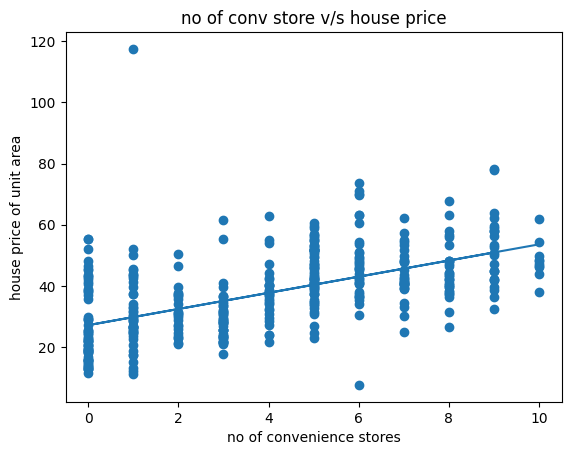

In [10]:
#visualising the regression by ploting the graph

plt.scatter(df['X4 number of convenience stores'], df['Y house price of unit area'])
plt.xlabel('no of convenience stores')
plt.ylabel('house price of unit area')
plt.title("no of conv store v/s house price")

x = df['X4 number of convenience stores'].values
plt.plot(x,2.64311186*x + 27.14766000866842)